<a href="https://colab.research.google.com/github/ssosoo/2024_DS60/blob/main/%EC%98%A4%ED%86%A0%EC%9D%B8%EC%BD%94%EB%8D%94_%EC%86%90%EA%B8%80%EC%94%A8%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
# MNIST 데이터 획득
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# 데이터 전처리
# 학습 데이터
# 28*28=784 픽셀 형태의 이미지 데이터를, 60000개의 샘플, 각 샘플당 784개의 특성을 가진 2D배열로 평평하게 만든다.
x_train = x_train.reshape(60000, 784)

# 테스트 데이터 중 300개만 선택해서 테스트 데이터로 사용
x_test = x_test[:300]
y_test = y_test[:300]
x_test = x_test.reshape(300, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# 데이터 정규화
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale

**텐서플로 모델 만들기**

In [4]:
# 시각화를 위해 3차원 데이터로 인코딩
encoding_dim = 3

# MNIST 데이터를 입력으로 받습니다. (28*28=784)
input_img = Input(shape=(784,))
# encoded는 3차원으로 축소된 입력값입니다.
encoded = Dense(encoding_dim, activation='relu')(input_img)
# decoded는 MNIST 차원으로 복원된 값입니다.
decoded = Dense(784, activation='sigmoid')(encoded)

# 오토인코더는 입력값과 복원값을 최소화하는 과정을 거칩니다.
autoencoder = Model(input_img, decoded)
# 3차원으로 압축된 값을 받기 위해 인코더를 별개의 모델로 생성합니다.
encoder = Model(input_img, encoded)

# 디코더의 입력값을 지정합니다.
encoded_input = Input(shape=(encoding_dim,))
# 디코더 레이어는 오토인코더의 마지막 레이어입니다.
decoder_layer = autoencoder.layers[-1]
# 복원값 시각화를 위해 디코더를 모델로 지정합니다.
decoder = Model(encoded_input, decoder_layer(encoded_input))

# 모델 최적화
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

오토 인코더의 마지막 레이어를 decoder layer로 지정한다.

In [5]:
# 모델 학습
# 입력과 출력이 동일하다 !!
autoencoder.fit(x_train, x_train,
                epochs = 30,
                batch_size = 128,
                shuffle = True,
                validation_data = (x_test, x_test))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.4220 - val_loss: 0.2474
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.2480 - val_loss: 0.2272
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.2326 - val_loss: 0.2214
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2280 - val_loss: 0.2172
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.2248 - val_loss: 0.2144
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2232 - val_loss: 0.2128
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2219 - val_loss: 0.2116
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2205 - val_loss: 0.2103
Epoch 9/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2194 - val_loss: 0.2096
Epoch 10/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.2190 - val_loss: 0.2091
Epoch 11/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2182 - val_loss: 0.2088
Epoch 12/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/ste

In [6]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [7]:
encoded_imgs[0]

array([ 5.4869986, 13.922761 ,  8.210487 ], dtype=float32)

**데이터 시각화**


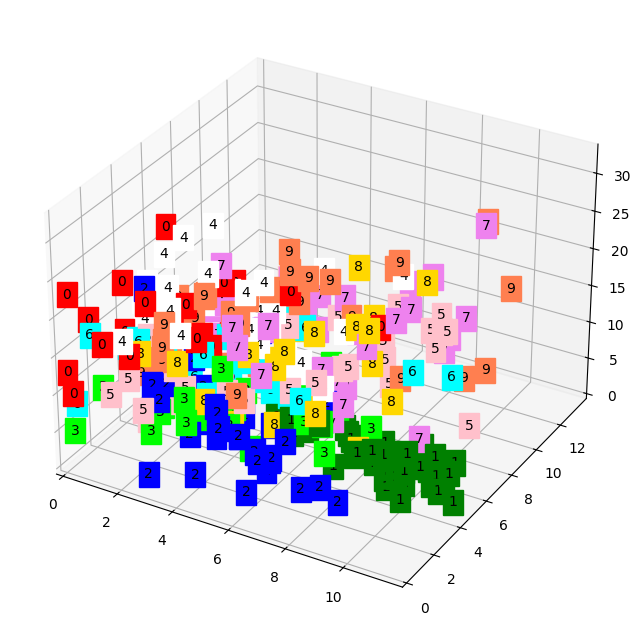

In [8]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,8

fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d')

xs = encoded_imgs[:, 0]
ys = encoded_imgs[:, 1]
zs = encoded_imgs[:, 2]

color = ['red', 'green', 'blue', 'lime', 'white', 'pink', 'aqua', 'violet', 'gold', 'coral']

for x, y, z, label in zip(xs, ys, zs, y_test):
  c = color[int(label)]
  ax.text(x,y,z,label,backgroundcolor=c)

ax.set_xlim(xs.min(), xs.max())
ax.set_ylim(ys.min(), ys.max())
ax.set_zlim(zs.min(), zs.max())

plt.show()

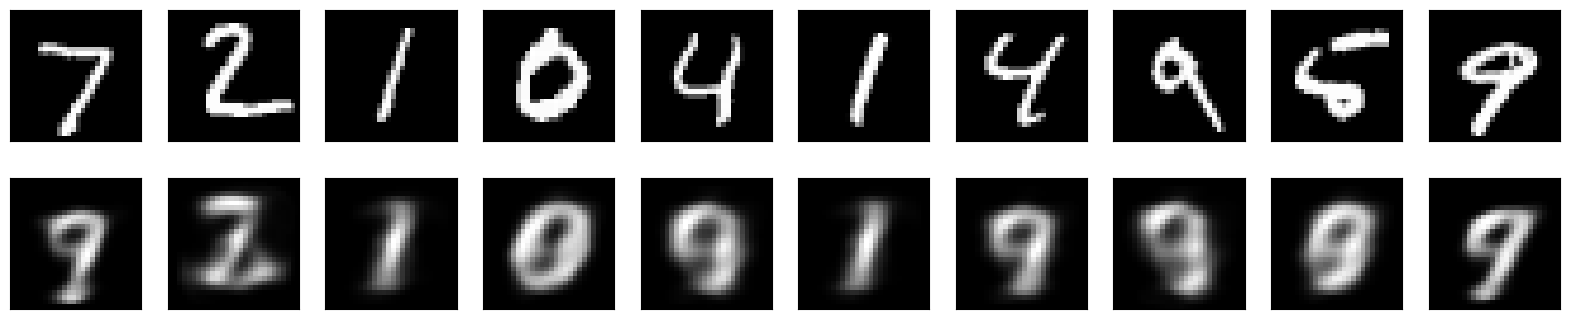

In [9]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # 원본 이미지 시각화
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  #복원 이미지 시각화
  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()